# Project UTS

**Wine Quality**

Data ini berisi kumpulan catatan uji laboratorium yang merinci sifat fisik dan kimia (physicochemical) dari berbagai sampel wine. Setiap baris mewakili satu wine dan berisi fitur-fitur seperti berbagai ukuran keasaman (fixed acidity, volatile acidity, citric acid, pH), tingkat kemanisan (residual sugar), kadar alkohol, kepadatan (density), serta kandungan kimia dan pengawet seperti chlorides dan sulphates. Konteks utama dari data ini adalah untuk tugas machine learning klasifikasi. Tujuannya adalah untuk melatih model, seperti Random Forest, menggunakan data training ini agar dapat "mempelajari" pola hubungan antara hasil tes kimia tersebut dengan kolom target, yaitu quality. Kolom quality ini adalah skor yang kemungkinan diberikan oleh panelis ahli. Pada akhirnya, model yang dilatih ini dapat digunakan untuk secara otomatis memprediksi skor kualitas wine baru data testing hanya berdasarkan data laboratoriumnya.

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')

dataset = "data_training.csv"
anggur = pd.read_csv(dataset)

print(anggur.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB
None


In [2]:
anggur

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


# Tahapan Data Understanding and Cleansing

In [3]:
print(f'Jumlah baris dan kolom di dataset wine quality adalah {anggur.shape}')
anggur.info()

Jumlah baris dan kolom di dataset wine quality adalah (857, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


Dari hasil diatas semua kolom terpenuhi dengan non-null artinya tidak ada kolom dan baris yang kosong

In [4]:
np.sum(anggur.isnull())

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Dalam pengecekan missing value hasilnya adalah 0 semua, artinya data ini tidak ada missing value

Deskriptif Data

In [5]:
display(anggur.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442,813.749125
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000,1597.000000


Dari hasil analisis rata-rata keasaman tetap adalah 8.27, kemudian rata-rata untuk keasaman yang mudah menguap adalah 0.53, keasaman sitrat memiliki rata-rata 0.28. Untuk gula residualnya berada dalam rata-rata 2.5, dengan kandungan klorida berada pada rata-rata 0,08, dilanjutkan dengan sulfur dioksida pada rata-rata 15.7. Selain itu dari data ini total sulfur dioksidanya berada pada rata-rata 45.9, dengan densitas 0.99, pH memiliki rata-rata 3.31 dan kandungan sulfat memiliki rata-rata 0.65. Ada juga kandungan alkohol dalam wine wuality ini memiliki rata-rata 10.43

In [6]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in anggur.columns :
    listItem.append( [col, anggur[col].nunique(), anggur[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,fixed acidity,87,"[7.3, 8.1, 10.1, 12.9, 8.4, 9.6, 8.5, 6.9, 6.0, 7.9, 9.3, 7.6, 6.6, 13.0, 7.7, 9.1, 11.1, 9.7, 11.4, 11.5, 9.8, 6.7, 10.8, 7.1, 6.8, 6.4, 7.0, 8.2, 8.8, 10.4, 6.5, 7.2, 5.9, 9.9, 10.7, 13.5, 8.0, 12.5, 9.0, 8.9, 7.5, 12.6, 5.3, 10.3, 7.4, 6.1, 12.8, 12.0, 6.2, 10.5, 7.8, 8.3, 11.3, 8.6, 6.3, 9.4, 13.3, 8.7, 9.2, 5.4, 5.6, 9.5, 10.0, 5.0, 11.9, 15.6, 11.2, 4.9, 13.4, 5.2, 5.1, 13.7, 10.6, 12.3, 11.6, 10.2, 11.7, 5.7, 15.0, 4.6, 12.2, 11.8, 5.8, 10.9, 12.4, 15.5, 12.7]"
1,volatile acidity,125,"[0.74, 0.575, 0.43, 0.5, 0.36, 0.6, 0.32, 0.49, 0.51, 0.825, 0.18, 0.72, 0.4, 0.63, 0.26, 0.765, 1.04, 0.3, 0.45, 0.42, 0.315, 0.41, 0.89, 0.69, 0.795, 0.57, 0.59, 0.28, 0.24, 0.885, 0.53, 0.79, 0.37, 0.395, 0.25, 0.56, 0.61, 0.35, 1.0, 0.67, 0.745, 0.98, 1.58, 0.22, 0.62, 0.685, 0.38, 0.635, 0.58, 0.835, 0.52, 0.33, 0.47, 0.21, 0.545, 0.415, 0.54, 0.935, 0.615, 0.55, 0.48, 0.66, 0.31, 0.46, 0.39, 0.2, 0.87, 0.27, 0.65, 0.75, 0.91, 0.725, 0.34, 0.875, 0.76, 0.73, 0.785, 0.845, 0.78, 0.605, 0.81, 0.83, 0.44, 0.77, 0.655, 0.715, 0.565, 0.84, 0.7, 0.695, 0.64, 0.88, 0.68, 0.975, 0.12, 0.29, 0.735, 0.915, 0.86, 0.955, ...]"
2,citric acid,75,"[0.08, 0.22, 0.4, 0.55, 0.32, 0.5, 0.42, 0.19, 0.0, 0.24, 0.51, 0.01, 0.36, 0.29, 0.65, 0.26, 0.04, 0.05, 0.68, 0.73, 0.46, 0.49, 0.54, 0.39, 0.27, 0.76, 0.3, 0.18, 0.6, 0.61, 0.14, 0.28, 0.21, 0.25, 0.03, 0.13, 0.37, 0.53, 0.09, 0.79, 0.58, 0.12, 0.06, 0.23, 0.17, 0.02, 0.66, 0.31, 0.2, 0.45, 0.43, 0.07, 0.41, 0.64, 0.47, 0.1, 0.72, 0.59, 0.74, 0.52, 0.34, 0.57, 0.48, 0.33, 0.38, 0.44, 0.69, 0.56, 0.11, 0.62, 0.35, 0.16, 0.15, 0.63, 1.0]"
3,residual sugar,74,"[1.7, 2.1, 2.6, 2.8, 2.2, 2.3, 1.75, 1.9, 1.8, 4.3, 2.0, 1.6, 8.3, 3.2, 2.7, 8.6, 2.5, 3.0, 2.4, 1.4, 4.8, 3.5, 3.3, 1.5, 5.8, 2.9, 6.3, 0.9, 4.0, 5.5, 3.4, 5.7, 3.1, 1.2, 3.8, 4.7, 3.7, 4.4, 1.3, 5.6, 5.9, 2.25, 6.1, 5.15, 7.9, 7.3, 3.45, 6.55, 4.5, 8.1, 4.65, 5.1, 5.0, 4.2, 6.7, 3.6, 7.2, 3.9, 4.1, 13.8, 2.05, 5.4, 6.4, 1.65, 6.2, 3.65, 8.8, 6.6, 6.0, 15.5, 5.2, 11.0, 4.6, 2.95]"
4,chlorides,123,"[0.094, 0.077, 0.092, 0.072, 0.081, 0.079, 0.075, 0.064, 0.084, 0.071, 0.076, 0.078, 0.093, 0.052, 0.062, 0.05, 0.066, 0.074, 0.085, 0.068, 0.611, 0.132, 0.08, 0.088, 0.065, 0.19, 0.104, 0.083, 0.166, 0.012, 0.087, 0.0559999999999999, 0.057, 0.063, 0.07, 0.12, 0.06, 0.114, 0.1369999999999999, 0.111, 0.067, 0.241, 0.069, 0.054, 0.213, 0.105, 0.086, 0.073, 0.09, 0.107, 0.119, 0.123, 0.096, 0.095, 0.103, 0.127, 0.049, 0.0969999999999999, 0.0579999999999999, 0.1169999999999999, 0.106, 0.089, 0.0819999999999999, 0.055, 0.099, 0.422, 0.091, 0.059, 0.414, 0.046, 0.039, 0.115, 0.1, 0.061, 0.0409999999999999, 0.118, 0.048, 0.102, 0.044, 0.122, 0.2, 0.043, 0.098, 0.178, 0.263, 0.171, 0.214, 0.042, 0.1009999999999999, 0.467, 0.045, 0.222, 0.153, 0.152, 0.038, 0.25, 0.11, 0.23, 0.4029999999999999, 0.205, ...]"
5,free sulfur dioxide,52,"[10.0, 12.0, 13.0, 7.0, 32.0, 28.0, 40.0, 5.0, 45.0, 6.0, 29.0, 51.0, 15.0, 19.0, 9.0, 4.0, 37.5, 3.0, 24.0, 8.0, 35.0, 18.0, 22.0, 25.0, 11.0, 36.0, 21.0, 17.0, 14.0, 23.0, 38.0, 16.0, 20.0, 37.0, 26.0, 40.5, 31.0, 34.0, 33.0, 30.0, 46.0, 27.0, 68.0, 39.0, 52.0, 1.0, 48.0, 43.0, 41.0, 66.0, 53.0, 42.0]"
6,total sulfur dioxide,129,"[45.0, 65.0, 52.0, 24.0, 79.0, 71.0, 19.0, 26.0, 54.0, 13.0, 88.0, 32.0, 17.0, 66.0, 77.5, 47.0, 77.0, 31.0, 14.0, 29.0, 278.0, 22.0, 16.0, 41.0, 15.0, 9.0, 148.0, 60.0, 70.0, 86.0, 91.0, 58.0, 57.0, 12.0, 100.0, 68.0, 49.0, 28.0, 33.0, 18.0, 46.0, 37.0, 62.0, 43.0, 64.0, 152.0, 75.0, 20.0, 84.0, 25.0, 53.0, 27.0, 44.0, 48.0, 165.0, 38.0, 35.0, 40.0, 114.0, 42.0, 56.0, 8.0, 61.0, 39.0, 63.0, 34.0, 99.0, 51.0, 10.0, 109.0, 94.0, 23.0, 142.0, 106.0, 85.0, 69.0, 59.0, 72.0, 89.0, 21.0, 119.0, 143.0, 36.0, 105.0, 144.0, 80.0, 74.0, 11.0, 112.0, 102.0, 134.0, 55.0, 30.0, 87.0, 122.0, 67.0, 128.0, 130.0, 50.0, 151.0, ...]"
7,density,339,"[0.99576, 0.9967, 0.99834, 1.00012, 0.9964, 0.9997, 0.99434, 0.99547, 0.995, 0.9972, 0.99524, 0.99668, 0.99704, 0.99

Dari analisis ini ditunjukan angka sempel yang digunakan untuk setiap kolom

# Data Eksplorasi

**Persentase wine quality**

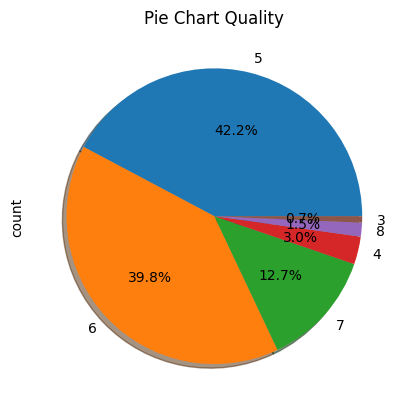

In [7]:
tipe = anggur['quality'].value_counts()
tipe.plot.pie(autopct='%.1f%%', shadow=True)
plt.title('Pie Chart Quality')
plt.show()

Dari pie chart diatas dapat disimpulkan bahwa kualitas anggur 5 dan 6 memiliki proporsi yang paling besar dalam dataset.

**Distribusi kandungan alkohol dengan quality**

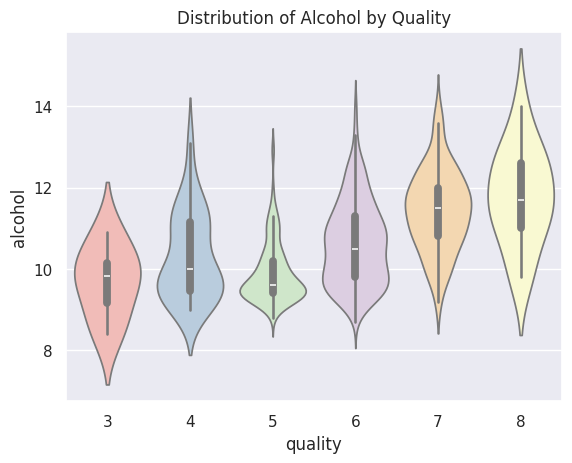

In [8]:
sns.set(style="darkgrid")
sns.violinplot(x='quality',y='alcohol',data=anggur,palette="Pastel1")
plt.title('Distribution of Alcohol by Quality')
plt.show()

Dari violin plot diatas, dapat disimpulkan bahwa distribusi kandungan alkohol bervariasi untuk setiap tingkat kualitas anggur. Kualitas anggur yang lebih tinggi (6, 7, 8) cenderung memiliki rentang kandungan alkohol yang lebih tinggi dan distribusinya terlihat sedikit berbeda dibandingkan dengan kualitas anggur yang lebih rendah (3, 4, 5). Ini menunjukkan bahwa kadar alkohol mungkin menjadi faktor penting dalam menentukan kualitas anggur.

**Distribusi Bertumpuk Kadar pH untuk Quality**

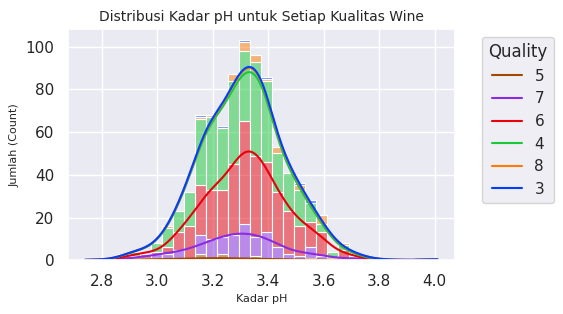

In [9]:
plt.figure(figsize=(5, 3))
sns.histplot(data=anggur, x='pH', hue='quality', kde=True, palette="bright", multiple="stack")

plt.title('Distribusi Kadar pH untuk Setiap Kualitas Wine', fontsize=10)
plt.xlabel('Kadar pH', fontsize=8)
plt.ylabel('Jumlah (Count)', fontsize=8)
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc=2, labels=anggur['quality'].unique())
plt.show()

Plot histogram bertumpuk ini menunjukkan distribusi kadar pH untuk berbagai kategori kualitas anggur. Dari hasil plot sebagian besar anggur, terlepas dari kualitasnya, memiliki kadar pH yang terpusat di rentang 3.2 hingga 3.4, dengan kualitas 4 (hijau) dan 6 (merah) merupakan yang paling dominan dalam dataset. Kurva distribusi untuk setiap kategori kualitas sangat tumpang tindih secara signifikan, yang mengindikasikan bahwa kadar pH saja kemungkinan bukan merupakan faktor pembeda yang kuat untuk menentukan kualitas anggur.

**Perbandingan Kadar Alkohol dengan Quality**

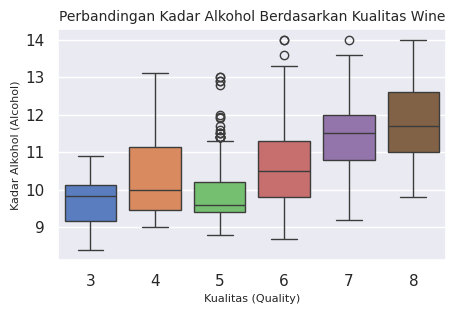

In [10]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=anggur, x='quality', y='alcohol', palette="muted")

plt.title('Perbandingan Kadar Alkohol Berdasarkan Kualitas Wine', fontsize=10)
plt.xlabel('Kualitas (Quality)', fontsize=8)
plt.ylabel('Kadar Alkohol (Alcohol)', fontsize=8)
plt.show()

Dari hasil boxplot menunjukkan tren positif yang jelas, seiring dengan meningkatnya kualitas anggur, median (garis tengah kotak) kadar alkoholnya juga cenderung ikut meningkat. Anggur dengan kualitas yang lebih tinggi  seperti 7 dan 8, tidak hanya memiliki kadar alkohol rata-rata yang lebih tinggi, tetapi juga rentang (variasi) kadar alkohol yang lebih besar.

**HUbungan antara Volatile Acidity dan Citric Acid**

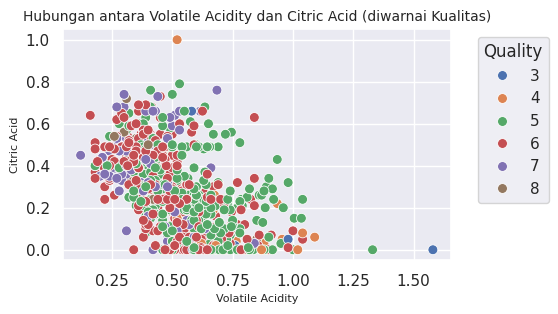

In [11]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=anggur, x='volatile acidity', y='citric acid', hue='quality', palette="deep", s=50)

plt.title('Hubungan antara Volatile Acidity dan Citric Acid (diwarnai Kualitas)', fontsize=10)
plt.xlabel('Volatile Acidity', fontsize=8)
plt.ylabel('Citric Acid', fontsize=8)
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

Scatter Plot ini menunjukkan adanya korelasi negatif antara 'Volatile Acidity' dan 'Citric Acid' yang artinya, semakin tinggi kadar keasaman volatil suatu anggur, kadar asam sitrat di dalamnya cenderung semakin rendah. Jika dilihat berdasarkan label 'Quality' (warna), terlihat bahwa anggur berkualitas lebih tinggi seperti 7 (ungu) dan 8 (cokelat) cenderung berkumpul di area 'Volatile Acidity' yang rendah (di sisi kiri) dan 'Citric Acid' yang relatif tinggi (di sisi atas).

**Distribusi kepadatan wine quality**

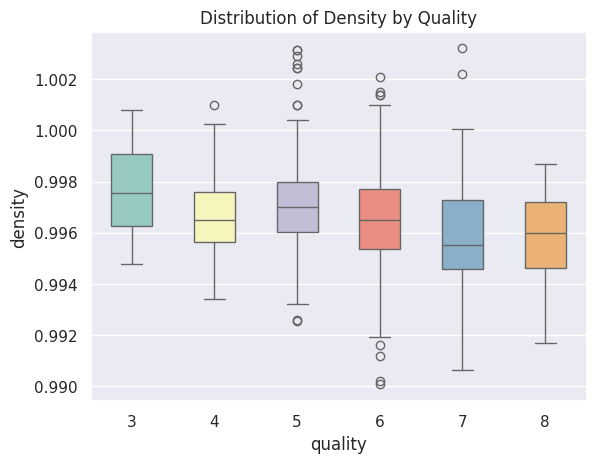

In [12]:
sns.boxplot(x="quality", y="density", data=anggur, palette="Set3", width=0.5)
plt.title('Distribution of Density by Quality')
plt.show()

Dari boxplot diatas, dapat disimpulkan bahwa distribusi kepadatan (density) bervariasi untuk setiap tingkat kualitas anggur. Kualitas anggur yang lebih tinggi (6, 7, 8) cenderung memiliki rentang kepadatan yang sedikit lebih rendah dibandingkan dengan kualitas anggur yang lebih rendah (3, 4, 5). Ini menunjukkan bahwa kepadatan mungkin menjadi faktor penting dalam menentukan kualitas anggur.

**Distribusi Volatile Acidity**

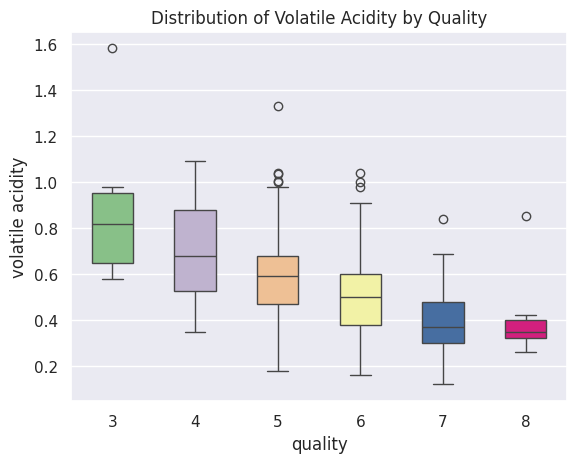

In [13]:
sns.boxplot(x="quality", y="volatile acidity", data=anggur, palette="Accent", width=0.5)
plt.title('Distribution of Volatile Acidity by Quality')
plt.show()

Boxplot ini menunjukkan tren negatif yang dimana seiring meningkatnya kualitas anggur dari 3 ke 8, median kadar 'volatile acidity' (keasaman volatil) cenderung menurun secara konsisten. Selain itu, anggur dengan kualitas yang lebih tinggi seperti 7 dan 8 juga memiliki rentang data yang lebih sempit dengan kotak lebih pendek, yang mengindikasikan kadar keasaman yang lebih stabil dan rendah

## Pengecekan Outlier

Membuat grid 4x3 untuk 12 plot...


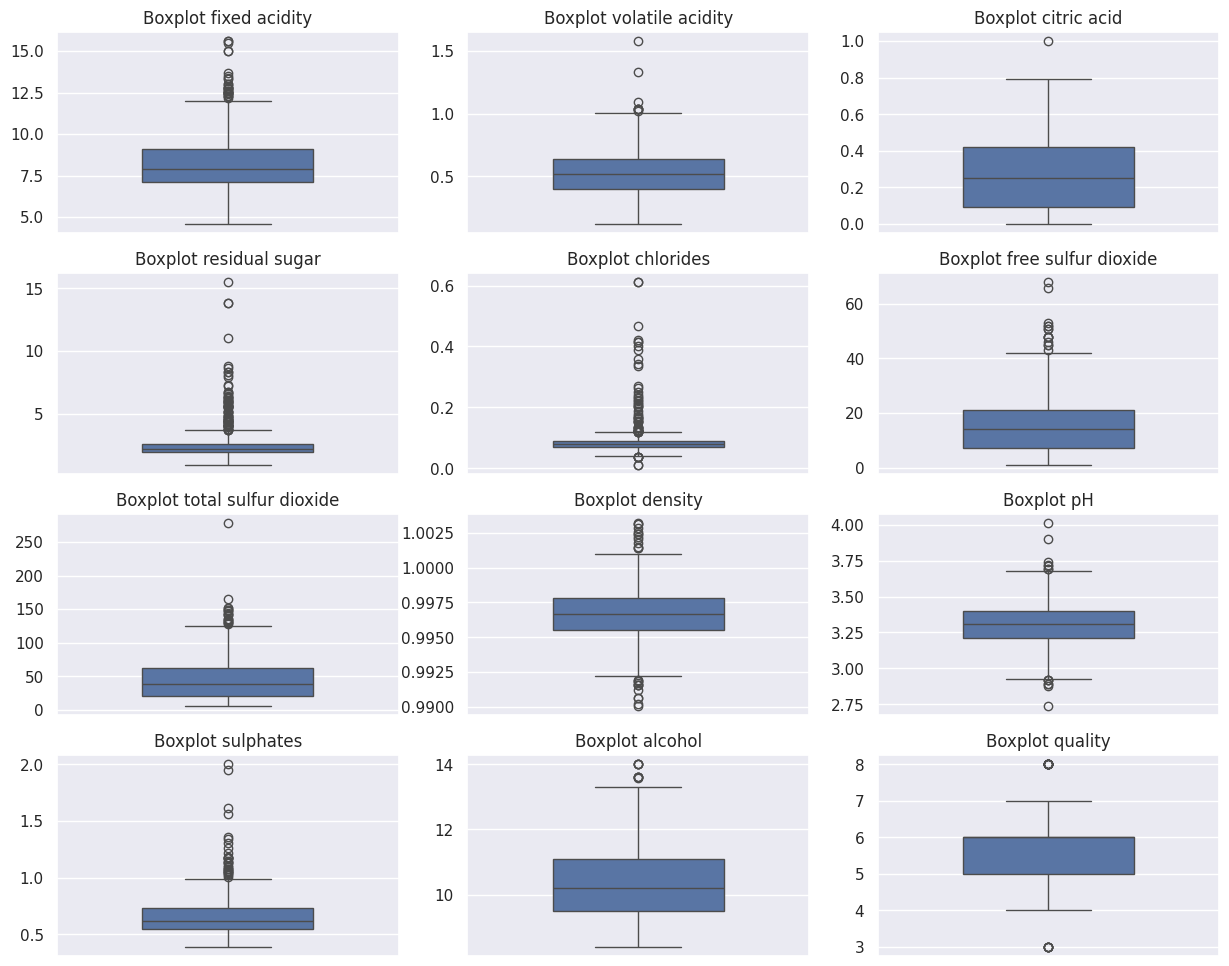

In [14]:
columns_to_plot = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]

n_plots = len(columns_to_plot)
n_cols_grid = 3
n_rows_grid = int(np.ceil(n_plots / n_cols_grid))
print(f"Membuat grid {n_rows_grid}x{n_cols_grid} untuk {n_plots} plot...")


fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(15, 12))
axes_flat = axes.flatten()

for i, col in enumerate(columns_to_plot):

    if col not in anggur.columns:
        print(f"Peringatan: Kolom '{col}' tidak ditemukan, dilewati.")
        continue

    ax = axes_flat[i]
    sns.boxplot(y=anggur[col], ax=ax, width=0.5)

    ax.set_title(f'Boxplot {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

for j in range(i + 1, n_rows_grid * n_cols_grid):
    axes_flat[j].axis('off')

Dari analisis ini terlihat bahwa semua variabel memiliki outlier, dan citric acid dan alcohol tampaknya memiliki jumlah outlier yang paling sedikit, meskipun tetap ada beberapa titik di sisi atas. Boxplot Quality tidak perlu dihiraukan karena itu yang akan menjadi prediksi dalm data ini

In [15]:
from scipy import stats
z = np.abs(stats.zscore(anggur._get_numeric_data()))
#mendapatkan data yang tidak outlier pada semua variabel
anggur1 = anggur[(z<3).all(axis=1)]
anggur1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


Dapat dilihat bahwa setelah dilakukan mengatasi outlier, data customer churn menjadi sebanyak 776 data. Lalu selanjutnya dilakukan pengecekan kembali menggunakan boxplot pada masing-masing variabel untuk mengetahui masihkah ada outlier dalam tiap variabel.

Membuat grid 4x3 untuk 12 plot...


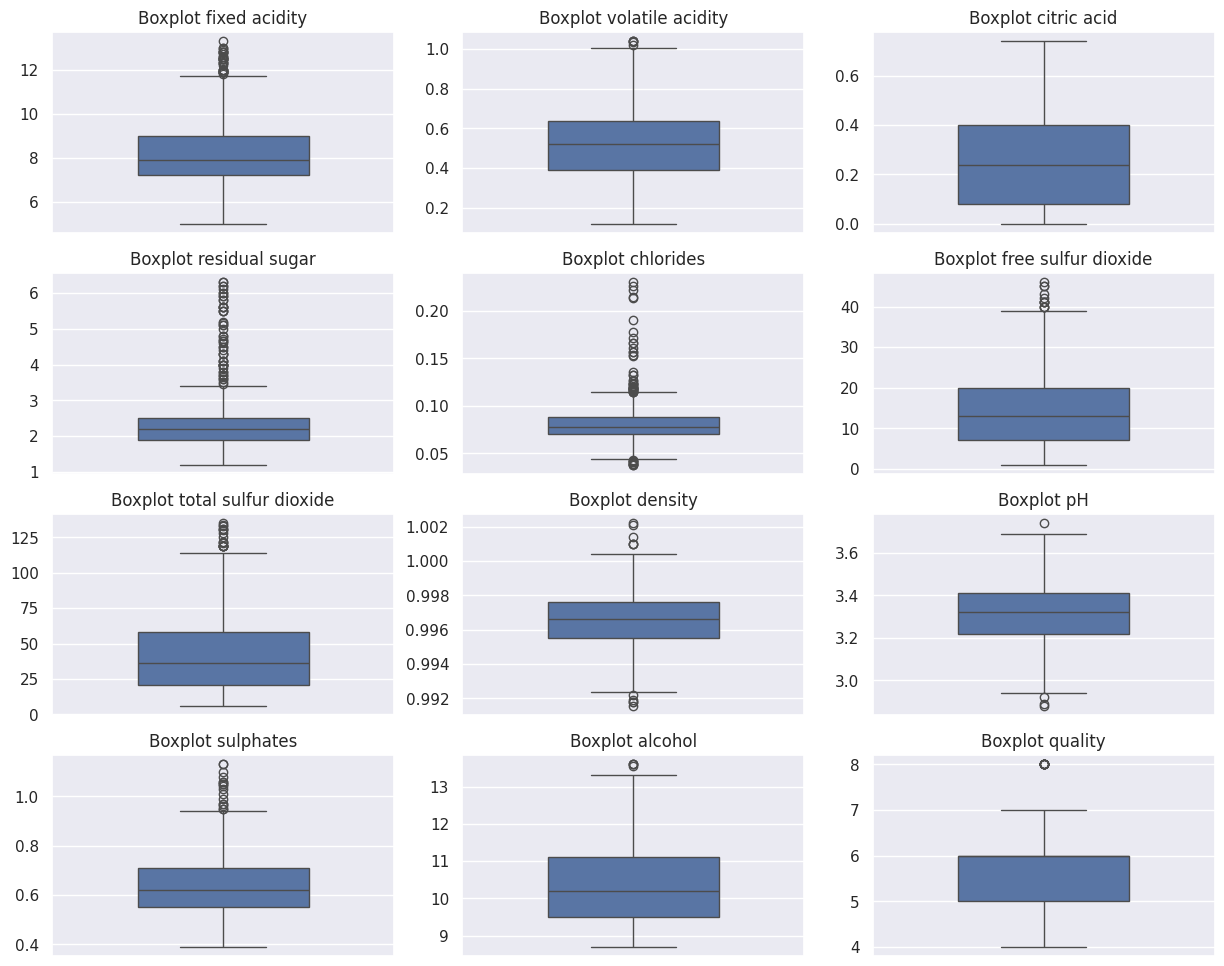

In [16]:
columns_to_plot = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]

n_plots = len(columns_to_plot)
n_cols_grid = 3
n_rows_grid = int(np.ceil(n_plots / n_cols_grid))
print(f"Membuat grid {n_rows_grid}x{n_cols_grid} untuk {n_plots} plot...")


fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(15, 12))
axes_flat = axes.flatten()

for i, col in enumerate(columns_to_plot):

    if col not in anggur.columns:
        print(f"Peringatan: Kolom '{col}' tidak ditemukan, dilewati.")
        continue

    ax = axes_flat[i]
    sns.boxplot(y=anggur1[col], ax=ax, width=0.5)

    ax.set_title(f'Boxplot {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

for j in range(i + 1, n_rows_grid * n_cols_grid):
    axes_flat[j].axis('off')

Dari hasil pengecekan ulang outliner, ternyata semua variabel masih terdapat outlier, tetapi pada variabel citric acid sudah tidak ada outlier. Pada variabel seperti residual sugar dan chlorides menunjukan bahwa nilai outlier atas yang cukup ekstrem dan tinggi bisa jadi lebih dari 10% dari jumlah data, maka pada kasus ini outlier pada data wine quality ini tetap digunakan. Sehingga dapat dilanjutkan ke analisis.

**Imbalance**

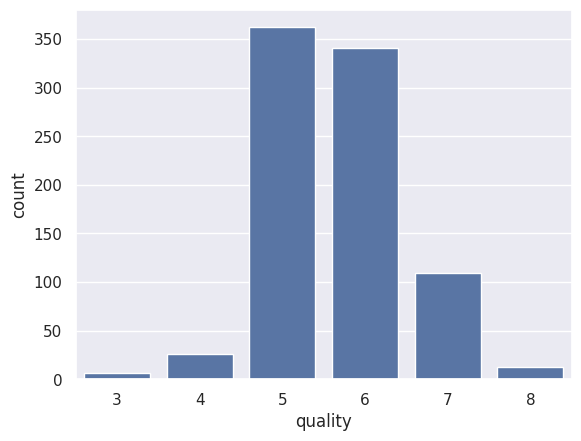

quality
5    0.422404
6    0.397900
7    0.127188
4    0.030338
8    0.015169
3    0.007001
Name: count, dtype: float64


In [17]:
# Mencari apakah dataset (kolom quality) imbalanced atau tidak
sns.countplot(x='quality',data=anggur)
plt.show()
persentase = anggur['quality'].value_counts()/anggur.shape[0]
print(persentase)


Dari Analisis ini menunjukan terjadi imbalence untuk kategori quality, dimana nilai quality dalam data ini tidak seimbang

**Mencari fitur apa saja yang kemungkinan menjadi prediktor yang baik**

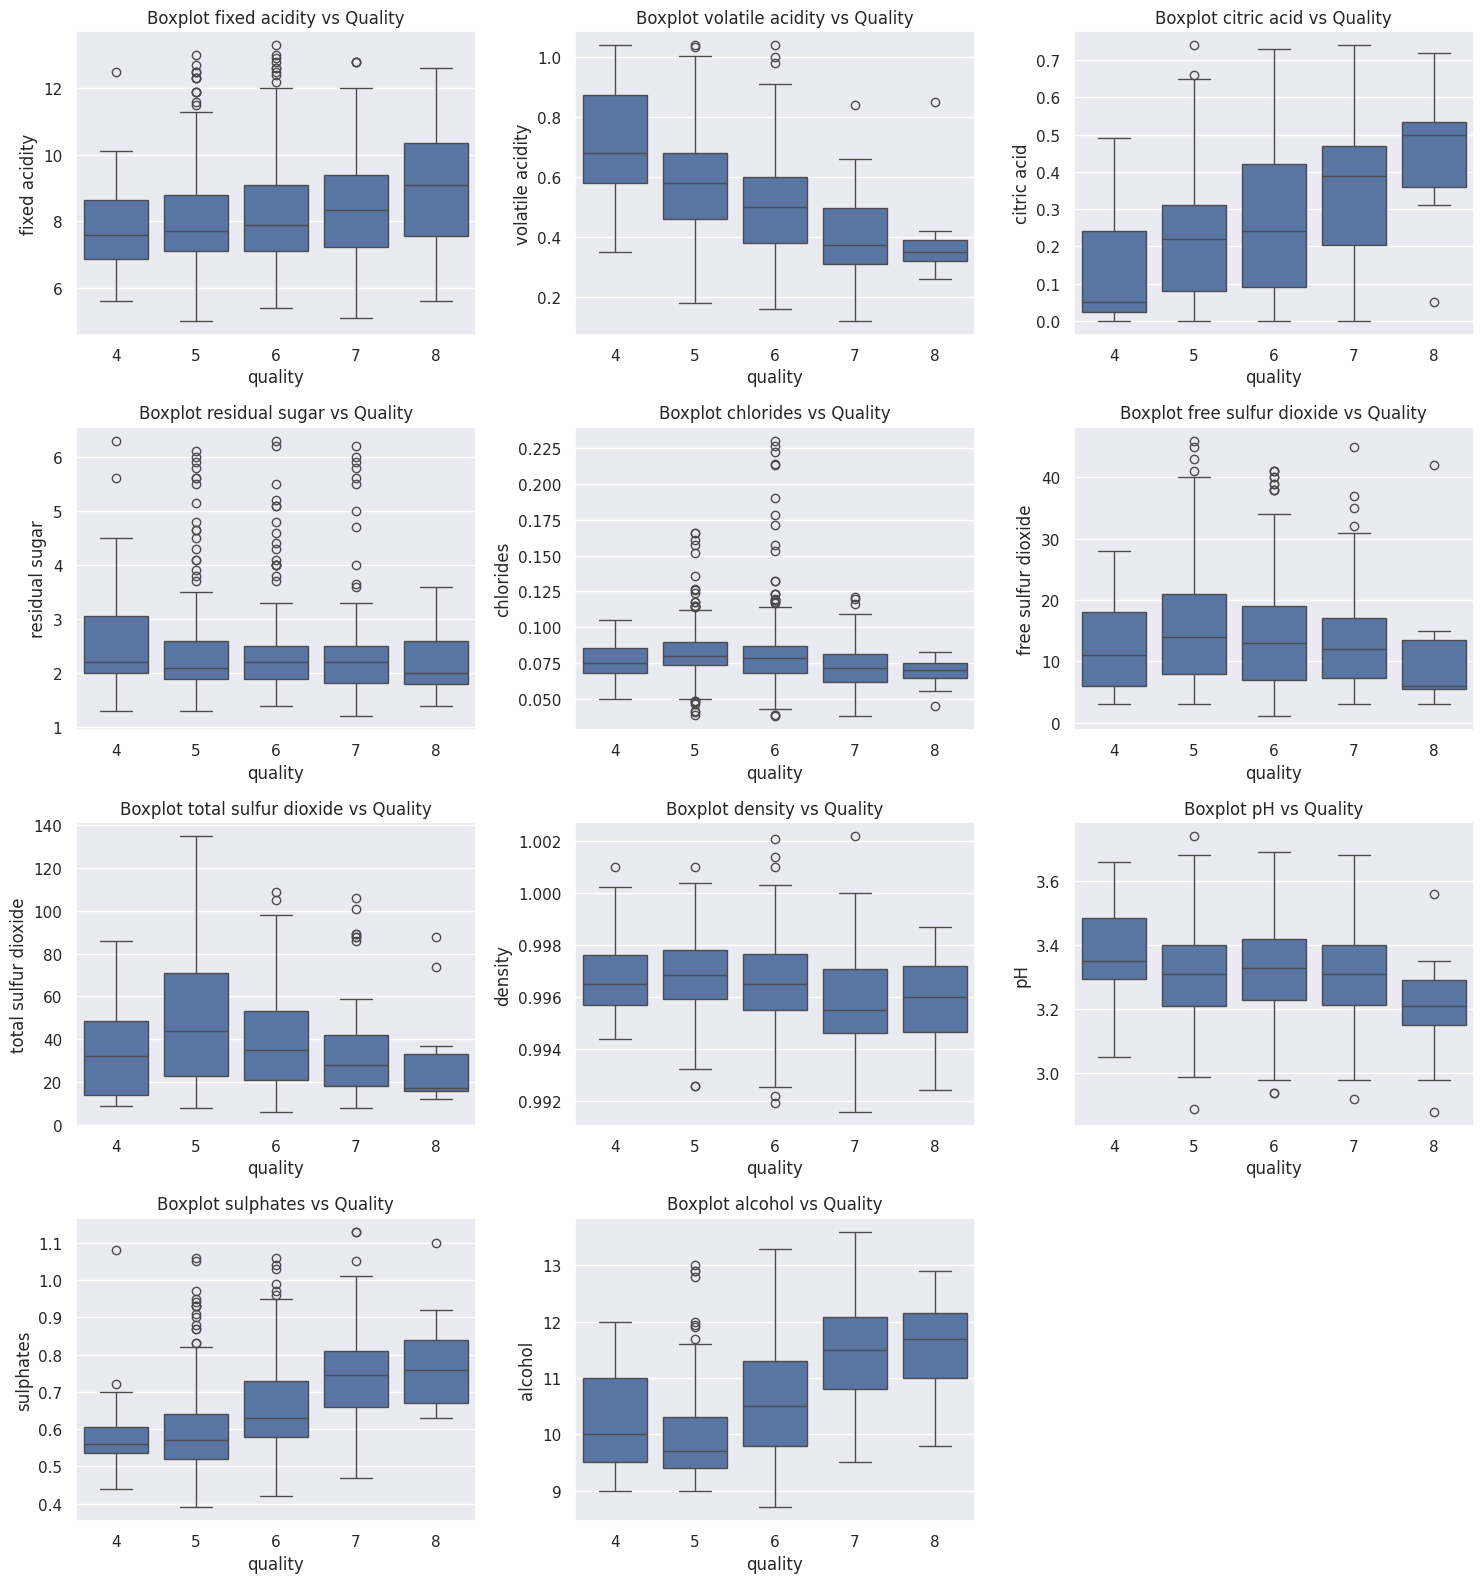

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define the list of features to plot
features_to_plot = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

n_cols = 3
n_rows = math.ceil(len(features_to_plot) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axs_flat = axs.ravel()

for i, feature in enumerate(features_to_plot):
    ax = axs_flat[i]
    sns.boxplot(data=anggur1, y=feature, x='quality', ax=ax)
    ax.set_title(f'Boxplot {feature} vs Quality', fontsize=12)

for j in range(i + 1, len(axs_flat)):
    axs_flat[j].axis('off')

plt.tight_layout()
plt.show() # Add plt.show() to display the plot

Dari analisis boxplot tersebut, fitur yang paling menonjol sebagai prediktor baik adalah alkohol , yang menunjukkan tren positif, semakin tinggi skor quality, semakin tinggi pula kadar alkoholnya, dengan sedikit tumpang tindih antar kategori. Prediktor kuat lainnya adalah volatile acidity yang menunjukkan tren negatif, di mana kualitas lebih tinggi memiliki kadar lebih rendah, serta citric acid dan sulphates keduanya menunjukkan tren positif yang jelas. Sebaliknya, beberapa fitur seperti pH, residual sugar, free sulfur dioxide, dan total sulfur dioxide tampaknya merupakan prediktor yang buruk, karena distribusi nilai mereka terlihat sangat mirip atau tumpang tindih (overlap) secara signifikan di semua kategori quality.

**Menghitung Martiks Korelasi**

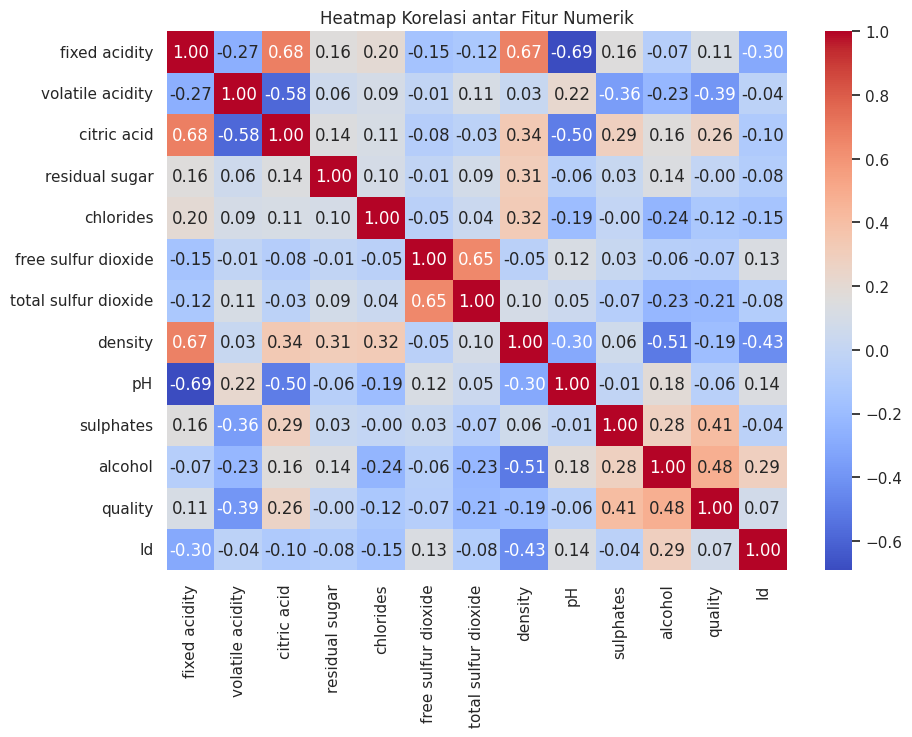

In [21]:
correlation_matrix = anggur1.corr(numeric_only=True)

# Plot heatmap dari matriks korelasi
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.show()

Dari analisis heatmap "Korelasi Metriks" tersebut, fitur yang menunjukkan korelasi positif terkuat dengan target (quality) adalah alcohol (dengan koefisien 0.49), diikuti oleh sulphates (0.31) dan citric acid (0.25). Sebaliknya, fitur dengan korelasi negatif terkuat terhadap quality adalah volatile acidity (-0.42). Sebagian besar fitur lainnya (seperti pH, residual sugar, chlorides) memiliki korelasi yang sangat lemah atau mendekati nol dengan quality. Penting juga untuk dicatat adanya multicollinearity (korelasi kuat antar-fitur) yang tinggi, seperti korelasi positif kuat antara fixed acidity dengan citric acid (0.67) dan density (0.67), serta korelasi negatif kuat antara fixed acidity dan pH (-0.67).

## Modeling dan Evaluasi

**Panggil Library dari tap Package**

In [22]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,average_precision_score,roc_auc_score
from sklearn.metrics import r2_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import libarary Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

**Data Splitting**  


Pada proses data splitting ini kita akan membagi dataset menjadi 2 bagian yaitu data untuk training dan data untuk testing. Pembagian data tersebut kita atur sebesar 80% data untuk data training dan 20% data untuk data testing.

In [23]:
X=anggur1.drop(columns=['quality', 'Id'])
y=anggur1['quality']

In [24]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
le = LabelEncoder()
y = le.fit_transform(y)

# Binarize the target variable for multi-class metrics
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y)
y_test_bin = lb.transform(y_test)

In [26]:
# Deskripsi singkat data training
print("Info Data Training:")
print(X_train.info())

# Deskripsi singkat data testing
print("Info Data Testing:")
print(X_test.info())

Info Data Training:
<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, 483 to 753
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         620 non-null    float64
 1   volatile acidity      620 non-null    float64
 2   citric acid           620 non-null    float64
 3   residual sugar        620 non-null    float64
 4   chlorides             620 non-null    float64
 5   free sulfur dioxide   620 non-null    float64
 6   total sulfur dioxide  620 non-null    float64
 7   density               620 non-null    float64
 8   pH                    620 non-null    float64
 9   sulphates             620 non-null    float64
 10  alcohol               620 non-null    float64
dtypes: float64(11)
memory usage: 58.1 KB
None
Info Data Testing:
<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 165 to 332
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtyp

Dari deskripsi data training dan testing di atas, dapat dilihat bahwa:

1. Data training terdiri dari 620 entri, sedangkan data testing terdiri dari 156 entri.
2. Kedua dataset memiliki 11 kolom.
3. Tidak ada nilai yang hilang (null) pada kedua dataset

**Modelling**

Selanjutnya kita akan memulai tahap pembuatan model machine learning. Pembuatan model ini kita akan menggunakan beberapa metode dengan parameter defaultnya. Ada 3 metode yang akan kita coba yaitu :

1. KNeighbours Classifier
2. Logistic Regression
3. Random Forest Classifier

### K-nearest Neighbors

In [27]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
Y_predknn = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_predknn)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predknn)
accuracy = accuracy_score(y_test,Y_predknn)
precision = precision_score(y_test, Y_predknn, average='weighted')
recall = recall_score(y_test, Y_predknn, average='weighted')
f1 = f1_score(y_test,Y_predknn, average='weighted')
knn_probs_full = knn.predict_proba(X_test)

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

if y_test_bin.shape[1] == 1 and len(lb.classes_) == 2:
    PRscore = average_precision_score(y_test, knn_probs_full[:, 5])
else:
    PRscore = average_precision_score(y_test_bin, knn_probs_full, average='weighted')

knn_auc = roc_auc_score(y_test, knn_probs_full, multi_class='ovr', average='weighted')

print('Confusion matrix for KNN with 80% : 20% \n', cm)
print('accuracy_KNN : %.3f' % accuracy)
print('precision_KNN : %.3f' % precision)
print('recall_KNN: %.3f' % recall)
print('f1-score_KNN : %.3f' % f1)
print('PR-score_KNN : %.3f' %PRscore)
print('ROC-AUC-score_KNN : %.3f' %knn_auc)

Confusion matrix for KNN with 80% : 20% 
 [[ 0  1  2  0  0]
 [ 4 41 23  5  0]
 [ 1 19 32 10  0]
 [ 0  4  3  7  1]
 [ 0  1  1  1  0]]
accuracy_KNN : 0.513
precision_KNN : 0.528
recall_KNN: 0.513
f1-score_KNN : 0.518
PR-score_KNN : 0.463
ROC-AUC-score_KNN : 0.619


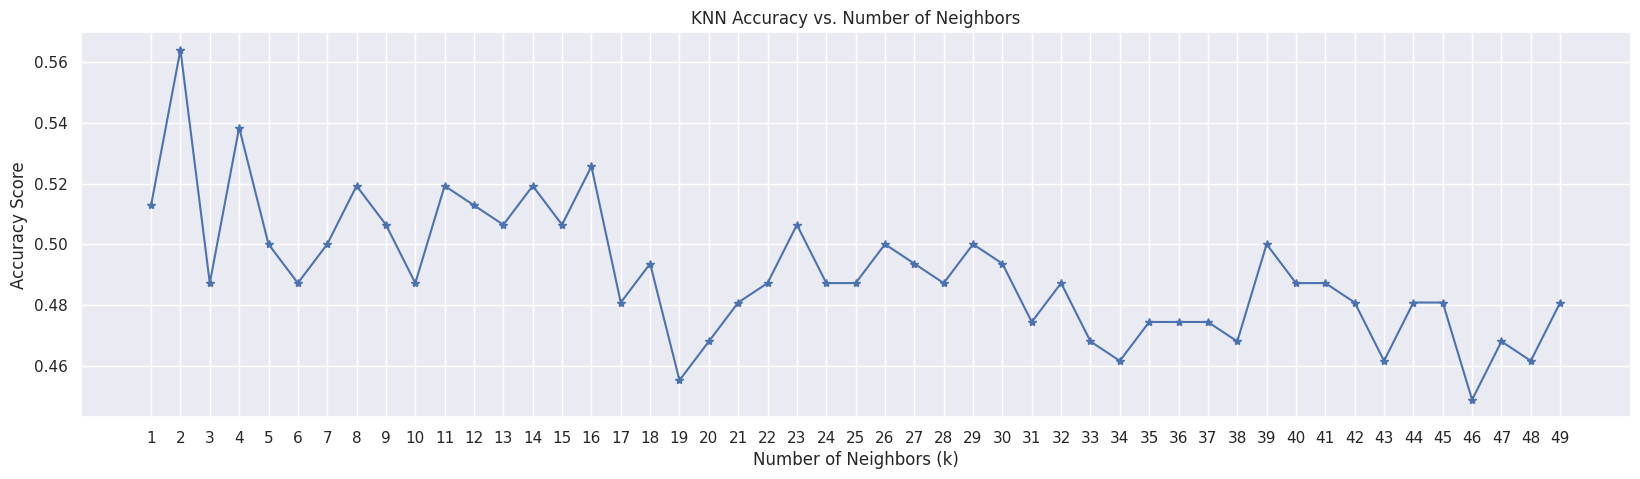

In [28]:
plt.figure(figsize=(20, 5))

a_index = list(range(1, 50))
x = range(1, 50)
a = []

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    a.append(accuracy_score(y_test, prediction))

plt.plot(a_index, a, marker="*")
plt.xticks(x)
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.show()

### Logistic Regression

In [29]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=1000)
logreg.fit(X_train, y_train)
Y_predlr = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test, Y_predlr)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predlr)
accuracy = accuracy_score(y_test,Y_predlr)
precision = precision_score(y_test, Y_predlr, average='weighted')
recall = recall_score(y_test, Y_predlr, average='weighted')
f1 = f1_score(y_test,Y_predlr, average='weighted')

logreg_probs_full= logreg.predict_proba(X_test)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

if y_test_bin.shape[1] == 1 and len(lb.classes_) == 2:
    PRscore = average_precision_score(y_test_bin, logreg_probs_full[:, 1])
else:
    PRscore = average_precision_score(y_test_bin, logreg_probs_full, average='weighted')


logreg_auc = roc_auc_score(y_test_bin, logreg_probs_full, multi_class='ovr', average='weighted')

print('Confusion matrix for Logistic Regression with 80% : 20% \n', cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)
print('PR-score_Logistic Regression : %.3f' %PRscore)
print('ROC-AUC-score_Logistic Regression : %.3f' %logreg_auc)

Confusion matrix for Logistic Regression with 80% : 20% 
 [[ 0  2  1  0  0]
 [ 0 53 20  0  0]
 [ 0 19 36  7  0]
 [ 0  2  8  5  0]
 [ 0  0  1  2  0]]
accuracy_Logistic Regression : 0.603
precision_Logistic Regression : 0.577
recall_Logistic Regression: 0.603
f1-score_Logistic Regression : 0.590
PR-score_Logistic Regression : 0.592
ROC-AUC-score_Logistic Regression : 0.738


### Random Forest

In [30]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_predrf = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_predrf)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predrf)
accuracy = accuracy_score(y_test,Y_predrf)
precision = precision_score(y_test, Y_predrf, average='weighted')
recall = recall_score(y_test, Y_predrf, average='weighted')
f1 = f1_score(y_test,Y_predrf, average='weighted')
rf_probs_full = random_forest.predict_proba(X_test)

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

if y_test_bin.shape[1] == 1 and len(lb.classes_) == 2:
     PRscore = average_precision_score(y_test_bin, rf_probs_full[:, 1])
else:
    PRscore = average_precision_score(y_test_bin, rf_probs_full, average='weighted')

rf_auc = roc_auc_score(y_test_bin, rf_probs_full, multi_class='ovr', average='weighted')

print('Confusion matrix for Random Forest with 80% : 20%\n', cm)
print('accuracy_random_Forest : %.3f' % accuracy)
print('precision_random_Forest : %.3f' % precision)
print('recall_random_Forest : %.3f' % recall)
print('f1-score_random_Forest : %.3f' % f1)
print('PR-score_random_Forest : %.3f' %PRscore)
print('ROC-AUC-score_random_Forest : %.3f' %rf_auc)

Confusion matrix for Random Forest with 80% : 20%
 [[ 0  3  0  0  0]
 [ 0 57 13  3  0]
 [ 1 17 39  5  0]
 [ 0  0  8  7  0]
 [ 0  0  0  3  0]]
accuracy_random_Forest : 0.660
precision_random_Forest : 0.642
recall_random_Forest : 0.660
f1-score_random_Forest : 0.651
PR-score_random_Forest : 0.700
ROC-AUC-score_random_Forest : 0.796


In [31]:
results = pd.DataFrame({
    'Model': ['Random Forest',
              'KNN',
              'Logistic Regression'
             ],
    'Score': [acc_random_forest,
              acc_knn,
              acc_log
              ],
    "Accuracy_score":[accuracy_rf,
                      accuracy_knn,
                      accuracy_lr
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df_20 = result_df.reset_index(drop=True)
display(result_df_20.head(9))

,Model,Score,Accuracy_score
0,Random Forest,100.00,66.03
1,Logistic Regression,61.94,60.26
2,KNN,100.00,51.28


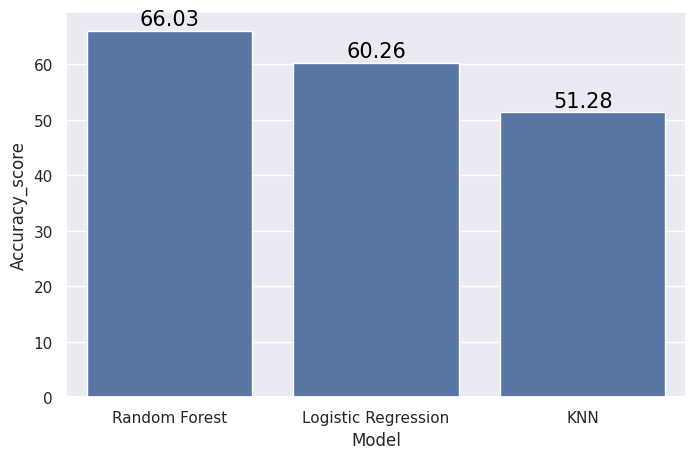

In [32]:
plt.subplots(figsize=(8,5))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df_20)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

Hasil akurasi terbaik dari visualisasi menggunakan bar chart yaitu klasifikasi Random Forest mendapatkan nilai akurasi yang paling optimum yaitu sebesar 66.03%. Sehingga klasifikasi Random Forest merupakan klasifikasi terbaik dari segi akurasi untuk partisi 80% : 20%.

Text(0.5, 19.049999999999997, 'Predicted label')

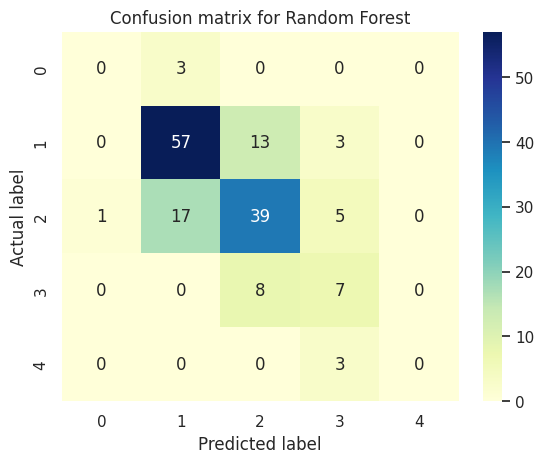

In [33]:
from sklearn import metrics
cm = confusion_matrix(y_test, random_forest.predict(X_test))
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title("Confusion matrix for Random Forest")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Prediksi Data Testing dengan Random Forest**

## Hyperparameter Tuning (Random Forest)

Tujuan dari hyperparameter tuning adalah untuk meningkatkan kinerja model dengan menemukan kombinasi hyperparameter yang menghasilkan hasil terbaik. Proses ini dilakukan dengan mencoba berbagai kombinasi hyperparameter dan mengevaluasi kinerja model pada set data validasi atau dengan menggunakan teknik validasi silang.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [36]:
# Menentukan daftar hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] # Removed 'auto' again
}

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=2022)
x_train_fin, y_train_fin = rus.fit_resample(X_train, y_train)

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='roc_auc_ovr_weighted')

# Melakukan tuning hyperparameter
grid_search.fit(x_train_fin, y_train_fin)

# Menampilkan hasil tuning
print(f'Best score: {grid_search.best_score_}')
print(f'Best params: {grid_search.best_params_}')

Best score: 0.8893100486733387
Best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Hasil tuning hyperparameter menunjukkan bahwa model dengan konfigurasi tertentu memberikan skor validasi tertinggi sebesar 0.9289. Konfigurasi terbaik untuk model Random Forest adalah sebagai berikut:

max_depth: 10  
max_features: 'sqrt'  
min_samples_leaf: 2  
min_samples_split: 5  
n_estimators: 200

In [38]:
from sklearn.pipeline import Pipeline

default_model = Pipeline([('model', random_forest)
])
default_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('model', RandomForestClassifier())])

In [39]:
best_model = grid_search.best_estimator_
best_model.fit(x_train_fin, y_train_fin)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [40]:
# 1. Ambil skor terbaik dari objek grid_rf
best_score_rf = grid_search.best_score_

# 2. Ambil parameter terbaik dari objek grid_rf
best_params_rf = grid_search.best_params_

# 3. Tampilkan hasilnya
print("--- Hasil Tuning Random Forest ---")
print(f"Model               : Random Forest")
print(f"Skor Akurasi Terbaik: {best_score_rf:.4f} (atau {best_score_rf*100:.2f}%)")
print(f"Parameter Terbaik   : {best_params_rf}")

--- Hasil Tuning Random Forest ---
Model               : Random Forest
Skor Akurasi Terbaik: 0.8893 (atau 88.93%)
Parameter Terbaik   : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [41]:
pip install imbalanced-learn

## Prediksi

Dalam prediksi data testing ini beberapa langkah yang dilakukan yaitu:

*   **Memuat Data:** Kode ini membaca dua file data_training.csv (untuk melatih model) dan data_testing.csv (untuk diprediksi). Data tersebut dimuat ke dalam DataFrame pandas bernama df_train dan df_test.
*   **Persiapan Data:** Pemisahan Fitur, kode ini mendefinisikan features (fitur) sebagai semua kolom di df_train kecuali kolom quality (target) dan Id (pengenal). Training Set, kode ini membuat X_train_full (fitur training) dan y_train_full (target quality training). Testing Set kode ini membuat X_test (fitur testing) dan test_ids (kolom Id dari data test, untuk disimpan di file akhir).
*   **Scalling (Preprocessing):** StandardScaler dibuat, Scaler ini dilatih (fit) HANYA pada X_train_full (data training) untuk mempelajari rata-rata dan standar deviasi dari data training. Kemudian, scaler ini digunakan untuk mentransformasi X_train_full dan X_test. Ini memastikan bahwa data testing di-scale menggunakan "aturan" yang sama dengan data training.
*   **SMOTE (Oversampling):** Kode ini mencetak distribusi kelas quality Anda sebelum diubah, untuk menunjukkan bahwa data tidak seimbang. Sebuah objek SMOTE dibuat. SMOTE diterapkan pada X_train_scaled dan y_train_full. Ini menciptakan data sintetis untuk kelas-kelas minoritas (seperti quality 3, 4, 8) hingga jumlahnya seimbang dengan kelas mayoritas. Hasilnya adalah X_train_resampled dan y_train_resampled yang sekarang seimbang.
*   **Pelatihan Model Final (Random Forest):** Sebuah model RandomForestClassifier baru dibuat. Model ini diinisialisasi menggunakan hyperparameter spesifik yang diperoleh pada tuning diawal. Model ini dilatih (fit) menggunakan data training yang sudah di-scaling dan di-SMOTE (X_train_resampled, y_train_resampled).
*   **Mmebuat Prediksi:** Model (model_rf_final) yang baru saja dilatih kini digunakan untuk memprediksi X_test_scaled (data testing yang hanya di-scaling). Hasil tebakan (prediksi) disimpan dalam variabel predictions.





In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import numpy as np

try:
    df_train = pd.read_csv("data_training.csv")
    df_test = pd.read_csv("data_testing.csv")
    print("Berhasil memuat 'data_training.csv' dan 'data_testing.csv'.")
except FileNotFoundError as e:
    print(f"Error: File tidak ditemukan. {e}")
    raise e

try:
    # Definisikan fitur (semua kolom selain 'quality' dan 'Id')
    features = [col for col in df_train.columns if col not in ['quality', 'Id']]

    # Ambil SEMUA data training
    X_train_full = df_train[features]
    y_train_full = df_train['quality']

    # Ambil data testing
    X_test = df_test[features]
    test_ids = df_test['Id'] # Simpan Id untuk file hasil akhir

    print("Fitur (X) dan target (y) telah didefinisikan.")
except KeyError as e:
    print(f"Error: Kolom tidak ditemukan. {e}")
    raise e

# Scaling (Preprocessing)
scaler = StandardScaler()
scaler.fit(X_train_full)
X_train_scaled = scaler.transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

# SMOTE (Oversampling)
# Menerapkan SMOTE pada seluruh data training untuk menyeimbangkan kelas
print(f"\nDistribusi kelas sebelum SMOTE:")
print(y_train_full.value_counts().sort_index())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_full)
print(f"Ukuran data training setelah SMOTE: {X_train_resampled.shape[0]} baris")

# Pelatihan Model FINAL (Random Forest)
# Gunakan hyperparameter TERBAIK dari hasil tuning
model_rf_final = RandomForestClassifier(
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Latih model pada data training yang sudah di-SMOTE
model_rf_final.fit(X_train_resampled, y_train_resampled)

# Membuat Prediksi
# Gunakan model final untuk memprediksi data testing
predictions = model_rf_final.predict(X_test_scaled)

# Membuat File Submission-
submission_df = pd.DataFrame({
    'Id': test_ids,
    'quality': predictions
})

submission_filename = "hasilprediksi_066.csv"
submission_df.to_csv(submission_filename, index=False)
print(f"File submission telah disimpan sebagai '{submission_filename}'.")

print("\n5 baris pertama dari file prediksi:")
print(submission_df.head())

Berhasil memuat 'data_training.csv' dan 'data_testing.csv'.
Fitur (X) dan target (y) telah didefinisikan.

Distribusi kelas sebelum SMOTE:
quality
3      6
4     26
5    362
6    341
7    109
8     13
Name: count, dtype: int64
Ukuran data training setelah SMOTE: 2172 baris
File submission telah disimpan sebagai 'hasilprediksi_066.csv'.

5 baris pertama dari file prediksi:
     Id  quality
0   222        5
1  1514        6
2   417        5
3   754        5
4   516        6


### Feature Importance

Fitur penting (feature importance) adalah metode untuk menilai kontribusi masing-masing fitur dalam membuat prediksi oleh model machine learning. Ini membantu kita memahami mana fitur yang paling berpengaruh dalam memprediksi target dan mana yang kurang penting.

<function matplotlib.pyplot.show(close=None, block=None)>

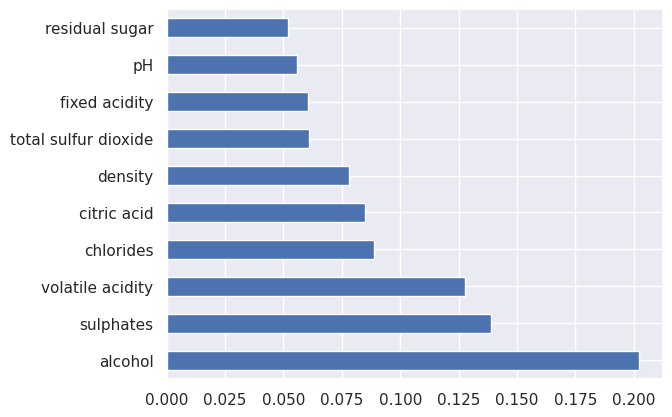

In [43]:
A=anggur1.drop(columns=['quality', 'Id'])
b=anggur1['quality']
feat_importance = pd.Series(random_forest.feature_importances_, index=A.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show

Variabel alkohol yang paling berpengaruh atau fitur penting untuk memprediksi kualitas wine, maka kandungan alkohol dalam anggur memiliki pengaruh yang signifikan terhadap kualitas wine.